
## Development of predictive regression model for Data Scientist jobs salaries 

## Pavel Makarov

### 2024-01-21


### In recent years, the increase of data worldwide has been exponential. Simultaneously, the enhancement of computational power has enabled the extraction of meaningful insights from the vast amounts of data. Over the past decade, the field of data science has evolved into a highly sought-after profession. Virtually every company now has an open position for a Data Scientist, reflecting the growing recognition of the value these professionals bring.

### This surge in demand is not only evident in the increasing number of job opportunities but is also reflected in the upward trajectory of salaries for both data scientists and data engineers. The intersection of business and data science is particularly intriguing, with platforms like LinkedIn leveraging this data boom to monitor skill trends and salary fluctuations. Similarly, companies offering learning courses are utilizing this wealth of information to tailor their offerings, ensuring that they equip individuals with the skills in highest demand, thus facilitating lucrative job placements.

### For me, as a begginer data scientist, there is a personal interest in navigating this dynamic landscape. I am keen to identify the specific areas and skills that will not only maximize my earning potential but also streamline my job search. With this objective in mind, I embark on a project to develop a predictive model for salary estimation based on skills and job titles. 

### The data set I am using to build a model has information about different job titles, information about the companies, what skills the job requires and estimated salaries. I want to try different models including - regression models, decision trees and potentially Neural Networks to acces their perofrance on this specififc task. The goal is to generate a model for salary prediction based on the skills, industry and job location.

#### For the first step the Exploratory data analysis will be performed to analyise the features of this data set

In [1]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the csv file and assign it to df variable
df = pd.read_csv('data_cleaned_2021.csv')

In [3]:
# Check the first 15 rows of the table
df.head(15)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,...,0,0,0,1,0,1,0,data scientist,na,na
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 - 1000,2008,...,0,0,0,0,0,0,0,data scientist,na,na
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 - 500,2005,...,1,0,0,0,0,0,0,data scientist,na,M
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+,2014,...,0,0,0,0,0,0,0,other scientist,na,P
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 - 200,2009,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
# check the size of the table
df.shape

(742, 42)

In [5]:
# Check the data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [6]:
# Since some of the column have '-1' values, they will be turned into NaN values and dropped from the analysis
df.replace(-1, pd.NA, inplace=True)
df.isna().sum()
df = df.dropna()

In [7]:
# Select all irrelevant columns
column_delete = ['Salary Estimate', 'Job Description', 'Headquarters', 'Founded', 'Industry','Competitors', 'Hourly', 'Employer provided', 'Age']

In [8]:
# Drop these irrelevant columns
df = df.drop(columns = column_delete, axis = 1)

In [9]:
# create a data frame just for the skills
df_skills = df.loc[:, 'Python':'google_an']

### For the first visualization I want to plot a bar graph that will represent the total counts of each individual skills applicable for each job entry. Since the data already foramted to 0 and 1 it does not require a transformation and can simply be counted using sum() function.

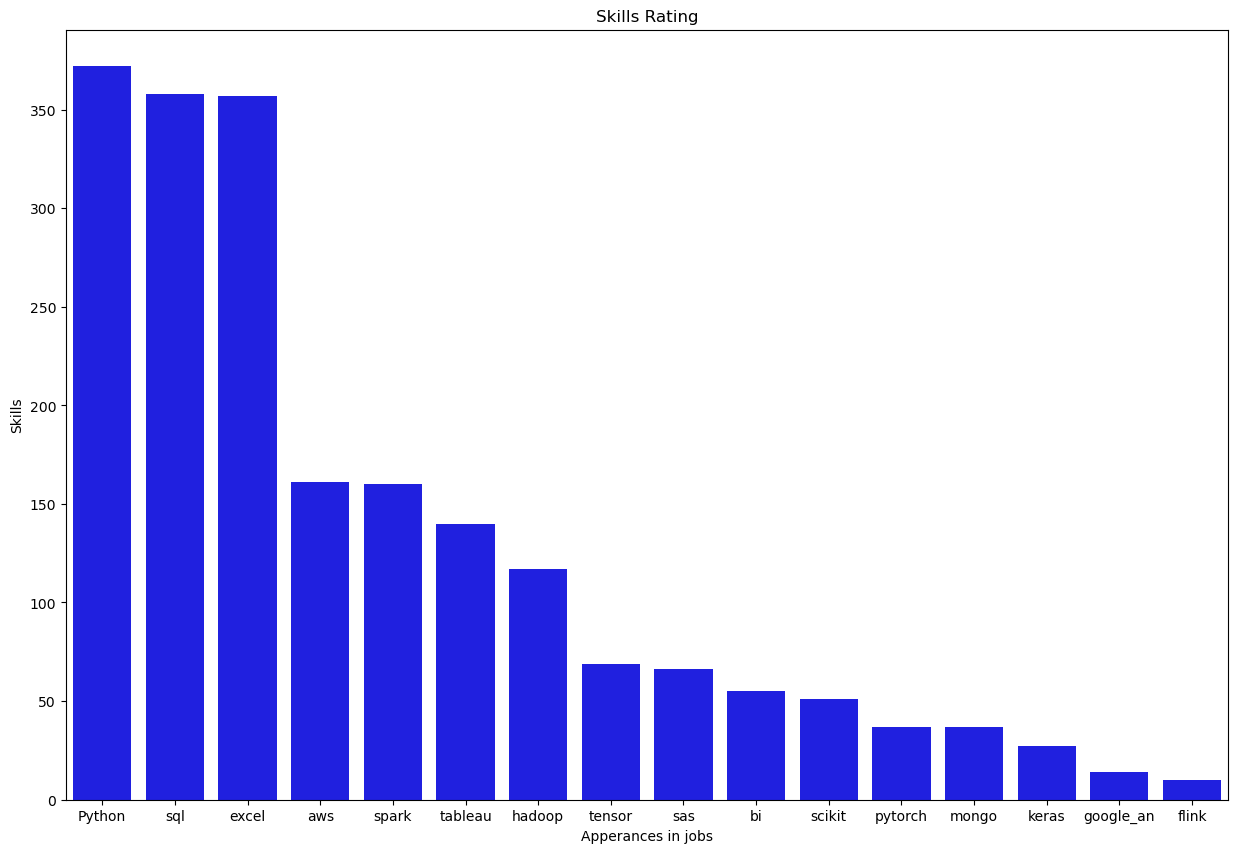

In [10]:
# Generate a box plot using seaborn package

# Assign figure parameters
plt.figure(figsize=(15, 10))

# Generate a box plot, as X use individual skills as Y use the summed amount of each skills for each job row
sns.barplot(x=df_skills.sum().sort_values(ascending=False).index, 
            y=df_skills.sum().sort_values(ascending=False).values, color = 'blue')

# Assign labels and title 
plt.ylabel('Skills')
plt.xlabel('Apperances in jobs')
plt.title('Skills Rating')

# Show the graph
plt.show()

### It is clearly evident that top 3 skills appeared in most of the jobs are - Python, SQL and Excel. This means that most of the data science related job postings require this three skills the most. 

### Below, I wanted to analyze the destribution of the Upper and Lower range of salaries. It is important to analyze salaries distributions to further work on regression models. The parameters like - modality, skewness, spread and kurtosis. Histograms will help defining these parametrs.

In [11]:
# Analyze quick descriptive statistic of the salary ranges
df[['Lower Salary', 'Upper Salary']].describe()

,Lower Salary,Upper Salary
count,690.000000,690.000000
mean,74.118841,127.991304
std,30.465004,45.498432
min,15.000000,16.000000
25%,52.000000,96.000000
50%,68.000000,124.000000
75%,90.750000,156.500000
max,202.000000,306.000000


<AxesSubplot:xlabel='Upper Salary', ylabel='Count'>

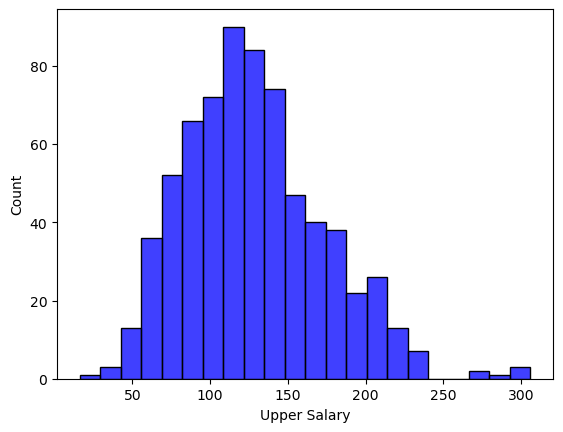

In [12]:
# Generate a histogram for the upper range of salaries
sns.histplot(data=df, x=df['Upper Salary'], color = 'blue')

<AxesSubplot:xlabel='Lower Salary', ylabel='Count'>

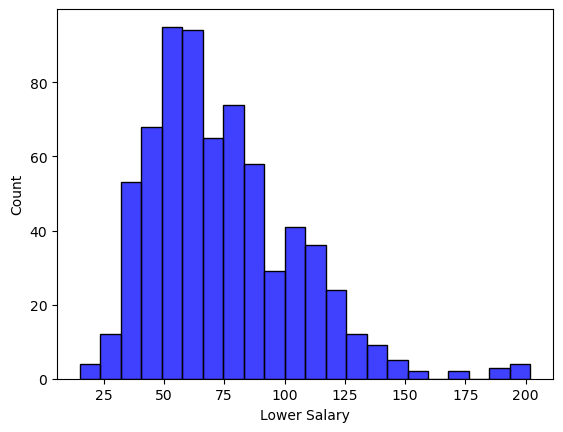

In [13]:
# Generate a histogram for the lower range of salaries
sns.histplot(data=df, x=df['Lower Salary'], color = 'blue')

### From the histograms we can see that both of the salary ranges (upper and lower) are normally distributed and unimodal. there are some outliers on the higher end of both of the graphs that need to be closesly inspected in future analysis. The lower range of the salaries is slightly positevely skewed.

 ### Using a scaterplot I wanted to analyze if there is any correlation between the company rating and upper salary value. 

<AxesSubplot:xlabel='Upper Salary', ylabel='Rating'>

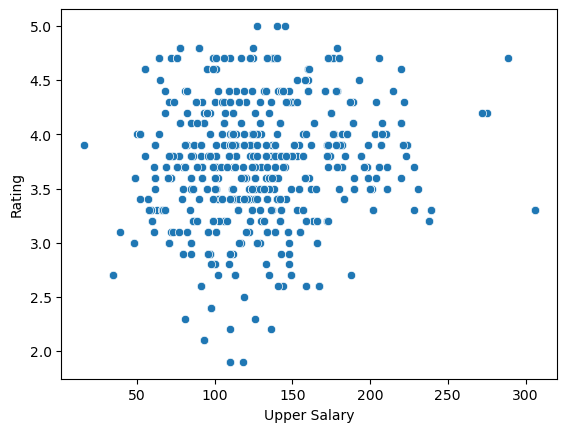

In [14]:
# Generate a scatter plot to analyze the correlation between company rating and upper salary
sns.scatterplot(data=df, x="Upper Salary", y="Rating")

### It is evident that there is no clear correlation between the company rating and the upper salary value, meaning company rating does not affect data sceintist salary, 

 ### The data set has information about companies location by state. It is important to analyze if there are states where data related postion has the highest compensation. For this analysis a bar graph was generated.

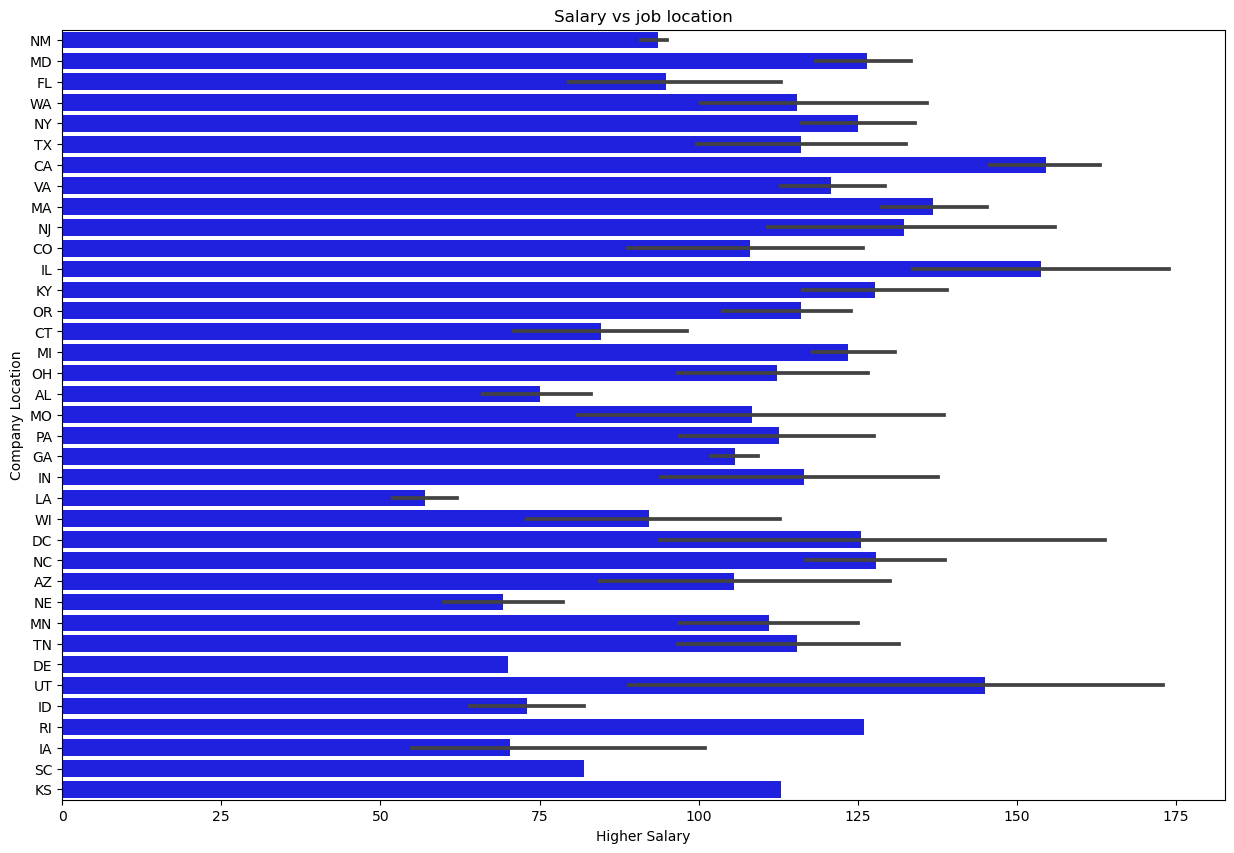

In [15]:
# Generate a bar graph for upper salaries based on the job location
# Assign figure parameters
plt.figure(figsize=(15, 10))

# Generate a box plot, as X use individual skills as Y use the summed amount of each skills for each job row
sns.barplot(x=df['Upper Salary'].sort_values(ascending=False), 
            y=df['Job Location'], color = 'blue')

# Assign labels and title 
plt.ylabel('Company Location')
plt.xlabel('Higher Salary')
plt.title('Salary vs job location')

# Show the graph
plt.show()

### Three states with the highest data related jobs salaries are - CA, IL, MA and the lowest are - NE, DE, ID

### It is important to know what kind of industries pay the highest salaries when making decision where to look fow a job. To analyze what type of industry has the most attractive compensations, a slary vs sector bar graph was generated

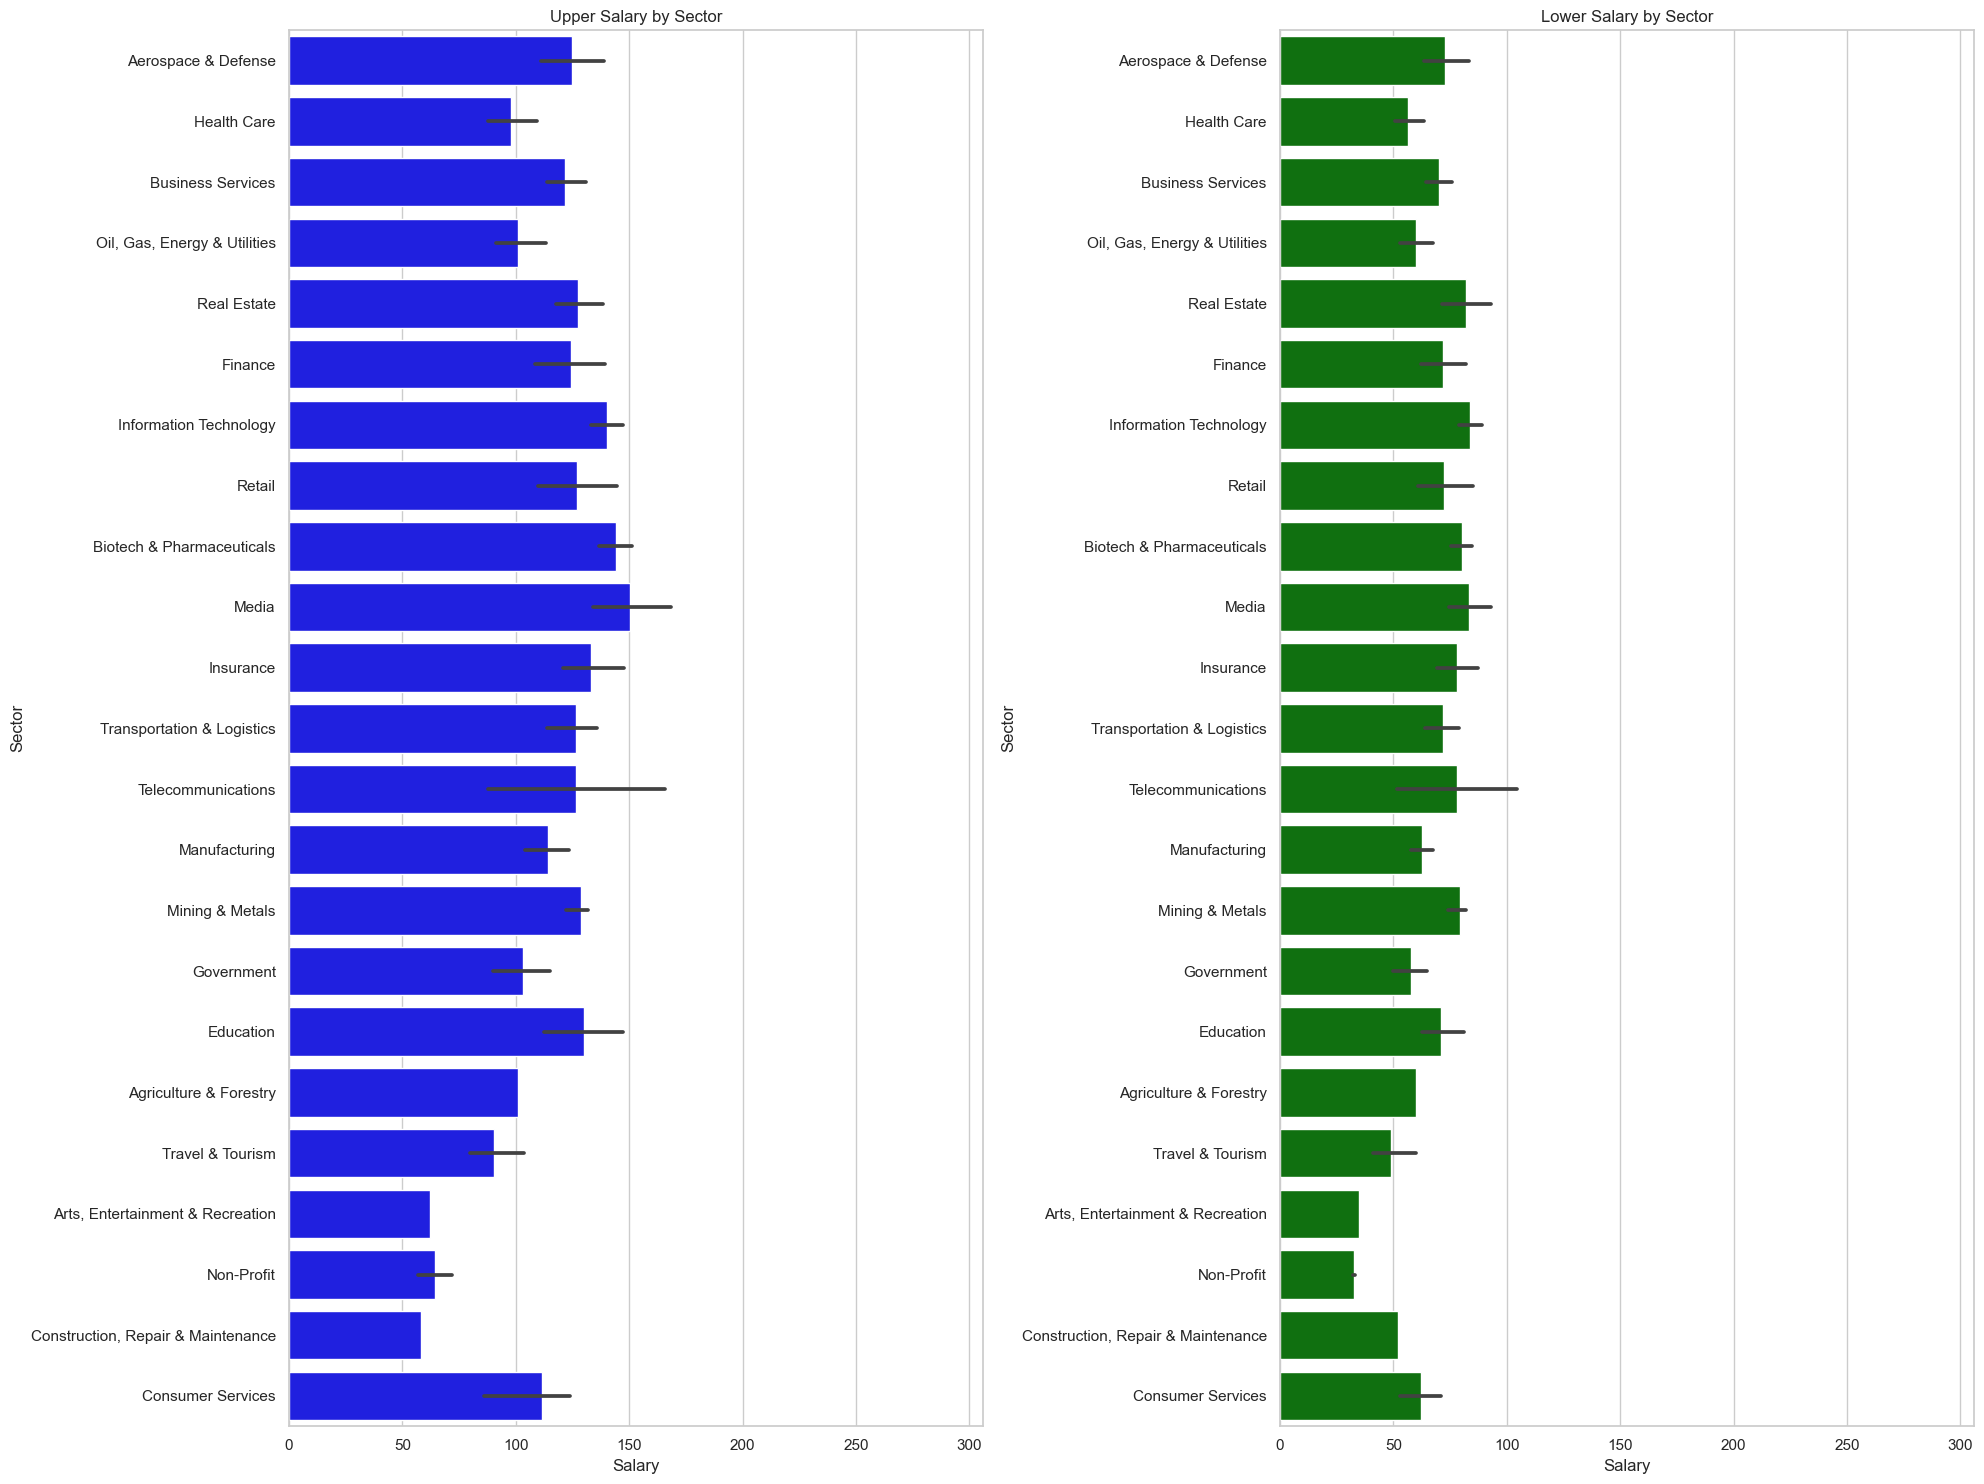

In [16]:
# Generate two bar plots to analyze the upper and lower salry ranges by the industry sector

# Set the style for seaborn
sns.set(style="whitegrid")

# Determine the common X axis range that will help to bring both salariy ranges on the same scale
common_x_range = max(df['Upper Salary'].max(), df['Lower Salary'].max())

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))

# Plot the graph for Upper Salary
sns.barplot(x=df['Upper Salary'], y=df['Sector'], ax=axes[0], color='blue')
axes[0].set_title('Upper Salary by Sector')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Sector')
axes[0].set_xlim(0, common_x_range) 

# Plot the graph for Upper Salary
sns.barplot(x=df['Lower Salary'], y=df['Sector'], ax=axes[1], color='green')
axes[1].set_title('Lower Salary by Sector')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Sector')
axes[1].set_xlim(0, common_x_range) 

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

### From these two graphs we can outline several industries that have both upper and lower range on the high side of the overall salaries range across all industries. They are - Information technology, Media, Accounting and Legal, Biotech and pharmaceuticals. There is also a '-1' sector that need to be removed prior to further analysis and model building.

# <span style="color:red"> Data Transformation </span>


### To perform machine learing model generation for salary prediction it is important to select and clean features that are necessary for accurate model building. In this step I will analyze my data set in terms of cleaneness and readeness for model building. First, I need to check for missing and NaN values. Second select specififc features that are necessary for modeling. If necessary new features will be created.

In [17]:
# check the columns and their formats
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 741
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               690 non-null    int64  
 1   Job Title           690 non-null    object 
 2   Rating              690 non-null    object 
 3   Company Name        690 non-null    object 
 4   Location            690 non-null    object 
 5   Size                690 non-null    object 
 6   Type of ownership   690 non-null    object 
 7   Sector              690 non-null    object 
 8   Revenue             690 non-null    object 
 9   Lower Salary        690 non-null    int64  
 10  Upper Salary        690 non-null    int64  
 11  Avg Salary(K)       690 non-null    float64
 12  company_txt         690 non-null    object 
 13  Job Location        690 non-null    object 
 14  Python              690 non-null    int64  
 15  spark               690 non-null    int64  
 16  aws     

#### For the modeling I decided to focus on avarage salary prediction based on skills and industry. Initially I was planning to include job location as well. For the modeling I can drop most of the feratures from this table since they are irrelevant to the salary. 

##### First, I want to clean up the data set if any missing values are present

In [18]:
# find if any values are missing
df.isna().sum()

index                 0
Job Title             0
Rating                0
Company Name          0
Location              0
Size                  0
Type of ownership     0
Sector                0
Revenue               0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

##### The data set has no missing values in it

In [19]:
# Create a list of column names to be dropped
columns_to_drop = ['index','Job Title','Location','Size','Type of ownership','Revenue','Lower Salary','Upper Salary','company_txt','Job Location','job_title_sim']

##### Also, I want to explore if seniortiy and degree can affect the salary and I should include it into modeling

In [20]:
# Drop selected columns
df.drop(columns_to_drop, axis = 1, inplace = True)

In [21]:
# Check the current state of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              690 non-null    object 
 1   Company Name        690 non-null    object 
 2   Sector              690 non-null    object 
 3   Avg Salary(K)       690 non-null    float64
 4   Python              690 non-null    int64  
 5   spark               690 non-null    int64  
 6   aws                 690 non-null    int64  
 7   excel               690 non-null    int64  
 8   sql                 690 non-null    int64  
 9   sas                 690 non-null    int64  
 10  keras               690 non-null    int64  
 11  pytorch             690 non-null    int64  
 12  scikit              690 non-null    int64  
 13  tensor              690 non-null    int64  
 14  hadoop              690 non-null    int64  
 15  tableau             690 non-null    int64  
 16  bi      

##### Next I want to analyze all non-numerical columns

In [22]:
# Analyze how many companies are in the table
df['Company Name'].value_counts()

Reynolds American\n3.1                         14
MassMutual\n3.6                                14
Takeda Pharmaceuticals\n3.7                    14
Software Engineering Institute\n2.6            11
PNNL\n3.8                                      10
                                               ..
Credera\n4.3                                    1
Spectrum Communications and Consulting\n3.4     1
Dayton Freight Lines, Inc.\n4.3                 1
TrueAccord\n3.4                                 1
Fivestars\n3.9                                  1
Name: Company Name, Length: 318, dtype: int64

In [23]:
# Check how many total unique company names
df['Company Name'].describe()

count                        690
unique                       318
top       Reynolds American\n3.1
freq                          14
Name: Company Name, dtype: object

##### Company name has 318 unique value.  It was decided to not include in the model building because it is not critical and also, can create overfitting.

In [24]:
# Check how many value counts for degree column
df['Degree'].value_counts()

na    354
M     243
P      93
Name: Degree, dtype: int64

In [25]:
# Calculate the percentage of missing values in the degree column
df['Degree'].value_counts('na')*100

na    51.304348
M     35.217391
P     13.478261
Name: Degree, dtype: float64

##### Unfortunately degree column has 51% of NA values, To avoid impact on the model performance and possible generation of bias it is necessary to remove this column.

In [26]:
# Drop both Degree and Company name column
df.drop(['Degree','Company Name'],axis = 1, inplace = True)

In [27]:
# Check the table
df.head()

,Rating,Sector,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,seniority_by_title
0,3.8,Aerospace & Defense,72.0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,na
1,3.4,Health Care,87.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na
2,4.8,Business Services,85.0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,na
3,3.8,"Oil, Gas, Energy & Utilities",76.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na
4,2.9,Business Services,114.5,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,na


##### For some reason rating is non-numerical, for moreling it has to be converted to float format

In [28]:
# Check the data type of Rating column from object to float
df['Rating'] = df['Rating'].astype('float64')

In [29]:
# check the results
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 741
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              690 non-null    float64
 1   Sector              690 non-null    object 
 2   Avg Salary(K)       690 non-null    float64
 3   Python              690 non-null    int64  
 4   spark               690 non-null    int64  
 5   aws                 690 non-null    int64  
 6   excel               690 non-null    int64  
 7   sql                 690 non-null    int64  
 8   sas                 690 non-null    int64  
 9   keras               690 non-null    int64  
 10  pytorch             690 non-null    int64  
 11  scikit              690 non-null    int64  
 12  tensor              690 non-null    int64  
 13  hadoop              690 non-null    int64  
 14  tableau             690 non-null    int64  
 15  bi                  690 non-null    int64  
 16  flink   

##### The sector column contains information about the job sector and for modeling purposes it can be converted into dummy variables,

In [30]:
# Find how many unique values in the sector column
df['Sector'].describe()

count                        690
unique                        23
top       Information Technology
freq                         171
Name: Sector, dtype: object

In [31]:
# Transform Sector column to dummy variable for modeling and assign to a new variable
df_transformed = pd.get_dummies(data=df[['Sector', 'seniority_by_title']])

In [32]:
# Check the results
df_transformed.head(10)

,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,...,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,seniority_by_title_jr,seniority_by_title_na,seniority_by_title_sr
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# Combine both table together and drop original Sector column
df = pd.concat([df, df_transformed], axis = 1)
df.drop(['Sector','seniority_by_title' ], axis = 1, inplace = True)

In [34]:
# Check the results
df.head(10)

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,...,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,seniority_by_title_jr,seniority_by_title_na,seniority_by_title_sr
0,3.8,72.0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.4,87.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.8,85.0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3.8,76.5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.9,114.5,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3.4,95.0,1,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,4.1,73.5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,3.8,114.0,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,3.3,61.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,4.6,140.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


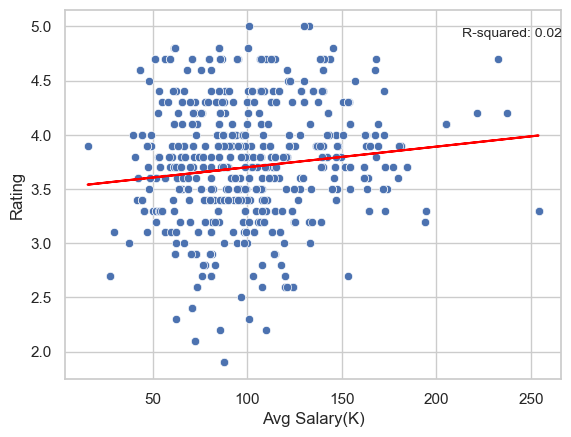

In [35]:
# Analyze the correlation between company rating and avarage salary

sns.scatterplot(data=df, x="Avg Salary(K)", y="Rating")

# Fit a linear regression model
X = df[['Avg Salary(K)']]
y = df['Rating']
model = LinearRegression()
model.fit(X, y)

# Predict ratings using the model
predictions = model.predict(X)

# Plot the regression line
plt.plot(X, predictions, color='red')

# Calculate and display R-squared value
r2 = r2_score(y, predictions)
plt.text(0.8, 0.95, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Show the plot
plt.show()

##### Since rating does not have any impactful correlation with R2 = 0.02 it can be excluded from model building as well

In [36]:
# Drop Rating column
df.drop('Rating', axis = 1, inplace = True)
df.head()

,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,...,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,seniority_by_title_jr,seniority_by_title_na,seniority_by_title_sr
0,72.0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,87.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,85.0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,76.5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,114.5,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### In the last step I want to analyze any possible multicolinearity with all skills that will be used for modeling

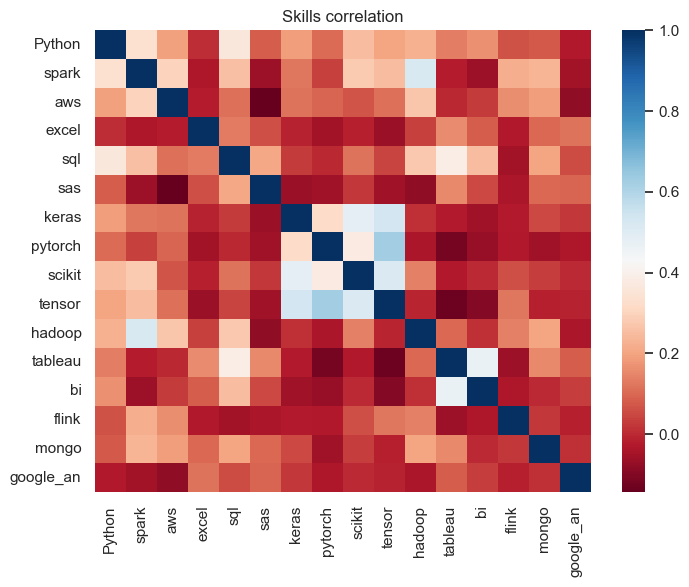

In [37]:
# Plot the heat map for all skills to find any possible multicolinearity 
plt.figure(figsize=(8, 6))
df_skills_cor = df_skills.corr()
sns.heatmap(df_skills_cor, cmap='RdBu')
plt.title('Skills correlation')
plt.show()

##### Only Pytorch, Sklearn and Tensor flow have some degree of correlation. It is possibly due to all of them being part of the machine learning tool box

In [38]:
df.to_csv('cleaned_df_salaries_2021.csv')

# <span style="color:red"> Modeling and evaluation </span>


#### For the prediction of continuous values, particularly the salary variable in this project, I have opted to employ the Linear Regression model as the prediction algorithm. Both Random Forest and XGBoost models, augmented with Grid Search CV, will also be evaluated for this study. The models will undergo training and evaluation processes, including feature selection and model selection to ensure optimal performance.

In [46]:
# Import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [47]:
# Check the final view of the table
df.head()

,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,...,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,seniority_by_title_jr,seniority_by_title_na,seniority_by_title_sr
0,72.0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,87.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,85.0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,76.5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,114.5,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### The target value of the salary is on different scale comparing to all the feaures I am trying to train the model on. In this case it is rational to apply log fucntion to the target to bring the values closer to the scale of the features.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 741
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Avg Salary(K)                              690 non-null    float64
 1   Python                                     690 non-null    int64  
 2   spark                                      690 non-null    int64  
 3   aws                                        690 non-null    int64  
 4   excel                                      690 non-null    int64  
 5   sql                                        690 non-null    int64  
 6   sas                                        690 non-null    int64  
 7   keras                                      690 non-null    int64  
 8   pytorch                                    690 non-null    int64  
 9   scikit                                     690 non-null    int64  
 10  tensor                    

In [102]:
# Bring the target values to log scale
df['Log_Avg_Salary'] = np.log(df['Avg Salary(K)'])

In [51]:
# Assign all training features to features variable by dropping log avg salary and avg salary columns
features = df.drop(columns= ['Log_Avg_Salary','Avg Salary(K)'])

In [52]:
# Assign log avg salary as target
target = df['Log_Avg_Salary']

In [119]:
# Split the data into train and test (20% for testing)
features_train, features_test,target_train,target_test = train_test_split(features,target, test_size = 0.2, random_state = 42)

### Generate a baseline linear model for model evaluation

In [120]:
# Generate an instance of dummy regressor
dummy_r = DummyRegressor(strategy = 'mean')

In [121]:
# Train a baseline model on the training set
dummy_r.fit(features_train, target_train)

DummyRegressor()

In [122]:
# Calculate the score of the baseline model
dummy_r.score(features_test, target_test)

-0.007581327545219674

#### The baseline dummy regression model has a score of -0.007.  This value will be used to compare to performance of the trained and tuned models

In [123]:
# Create a linear regression model instance
ols = LinearRegression()

In [124]:
# Train the model on the training set
model = ols.fit(features_train,target_train)

In [125]:
# Predict the log salaries of the test set
target_predict = model.predict(features_test)

In [126]:
# Find R2 value
r2 = r2_score(target_test, target_predict)
print("R-squared value of the Linear Regression model without tuning is - ", r2)

R-squared value of the Linear Regression model without tuning is -  0.3872601100783084


In [127]:
# Calculate mean squared error
mse = mean_squared_error(target_test, target_predict)

In [128]:
# Find the square root of MSE
rmse = np.sqrt(mse)
print("RMSE value of the Linear Regression model without tuning is - ", rmse)

RMSE value of the Linear Regression model without tuning is -  0.3104222041086653


### Perform PCA to asses the dimentionality reduction affect on model performance

In [129]:
# Use standard scaler to standrdize the training set
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)

# Use the same scaler to transform the testing data
features_test_scaled = scaler.transform(features_test)

In [130]:
# Generate Pricncipal Component Analysis function
pca = PCA(n_components = 0.90, whiten = True)

In [131]:
# Fit transorm standardized training data with PCA function
features_train_scaled_pca = pca.fit_transform(features_train_scaled)

In [132]:
features_test_scaled_pca = pca.transform(features_test_scaled)
features_test_scaled_pca.shape

(138, 31)

In [133]:
# Print the number of features before and after PCA
print('Number of features after PCA:',   features_train_scaled_pca.shape[1])
print('Number of features before PCA:',features_train_scaled.shape[1])

Number of features after PCA: 31
Number of features before PCA: 42


In [134]:
# Transform test set of features with PCA
features_test_scaled_pca = pca.transform(features_test_scaled)
features_test_scaled_pca.shape

(138, 31)

In [135]:
# Train a model with standardized features after PCA
model_pca = ols.fit(features_train_scaled_pca, target_train)

In [136]:
# Generate prediction with linear regression model trained on features after PCA
target_pred_pca = model_pca.predict(features_test_scaled_pca)

In [137]:
# Calcaulate R2 of the newly trained model
r2_pca = r2_score(target_test, target_pred_pca)
print("R-squared value of the Linear Regression model with PCA applied is - ", r2_pca)

R-squared value of the Linear Regression model with PCA applied is -  0.3695732578652464


In [138]:
# Calculate mean squared error
mse = mean_squared_error(target_test, target_pred_pca)
rmse = np.sqrt(mse)
print("RMSE value of the Linear Regression model with PCA applied is - ", rmse)

RMSE value of the Linear Regression model with PCA applied is -  0.3148705296967064


### Feature selection with Min Max scaler

In [139]:
# Create an instance of minmax scaler with 0 to 1 feaure values range
scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

In [140]:
# Fit and transform training features set with minmax scaler
features_minmax_train = scaler_minmax.fit_transform(features_train)

In [141]:
# Create a variance threshold with value 0.1. (Variance above 0.1)
threshold  = VarianceThreshold(threshold = .1)

In [142]:
# Fit and transform variance threshold filter
features_higher_variance_train = threshold.fit_transform(features_minmax_train)

In [143]:
# Transform the testing features with minmax scaler
features_minmax_test = scaler_minmax.transform(features_test)

In [144]:
# Transform the testing features with the same threshold
features_higher_variance_test = threshold.transform(features_minmax_test)

In [145]:
# Train a linear regression model on higher variance filtered features
model_minmax = ols.fit(features_higher_variance_train, target_train)

In [146]:
# Predict price with higher variance test features
target_pred_minmax_test = model_minmax.predict(features_higher_variance_test)

In [147]:
# Calculate R2
r2_minmax = r2_score(target_test, target_pred_minmax_test)
print("R-squared value of the Linear Regression model with MinMax applied is - ", r2_minmax)

R-squared value of the Linear Regression model with MinMax applied is -  0.3454862178778024


In [148]:
# Calculate mean squared error
mse = mean_squared_error(target_test, target_pred_minmax_test)
rmse = np.sqrt(mse)
print("RMSE value of the Linear Regression model with MinMax scaler applied is - ", rmse)

RMSE value of the Linear Regression model with MinMax scaler applied is -  0.32082935567889914


### A Lasso regression model training is also selected to test on the data because it has a built-in feauture selection mechanism and L1 regularization.

In [149]:
# Generate an instance of a Lasso Regression model and train themodel
lasso_model = Lasso(alpha=0.01)  
lasso_model.fit(features_train, target_train)

Lasso(alpha=0.01)

In [150]:
# Predict the target using test set of features
target_pred_lasso = lasso_model.predict(features_test)
mse_lasso = mean_squared_error(target_test, target_pred_lasso)


In [151]:
r2_lasso = r2_score(target_test, target_pred_lasso)
print("R-squared value of the Lasso Regression model is - ", r2_lasso)

R-squared value of the Lasso Regression model is -  0.29389696757598016


In [152]:
# Calculate mean squared error
mse_lasso = mean_squared_error(target_test, target_pred_lasso)
rmse = np.sqrt(mse_lasso)
print("RMSE value of the Lasso Regression model is - ", rmse)

RMSE value of the Lasso Regression model is -  0.33323356509192154


### Perhaps the data does not have a large sample size and Ridge regression wih L2 penalty can demosntrate better performance on this data set

In [153]:
# Generate a Ridge Regression instance and train a model on the train data set
ridge_model = Ridge(alpha=0.01)  # You can adjust the regularization parameter alpha
ridge_model.fit(features_train, target_train)

Ridge(alpha=0.01)

In [154]:
# Predict the salaries using test features set
target_pred_ridge = ridge_model.predict(features_test)


In [155]:
r2_ridge = r2_score(target_test, target_pred_ridge)
print("R-squared value of the Ridge Regression model is - ", r2_ridge)

R-squared value of the Ridge Regression model is -  0.3879433037721648


In [156]:
mse_ridge = mean_squared_error(target_test, target_pred_ridge)
rmse = np.sqrt(mse_ridge)
print("RMSE value of the Ridge Regression model is - ", rmse)

RMSE value of the Ridge Regression model is -  0.3102490983221381


### For the second type of learning algorithm Random Forest model was selected. It may have better prediction power that general linear regression model due to the nature of the features of the data set

In [157]:
# Create an instance of the Random Forest regressor
rfm = RandomForestRegressor()

In [158]:
# Apply the regressor to the training set
model_rf = rfm.fit(features_train, target_train)

In [159]:
# Predict the results using test set
target_predict_rf = model_rf.predict(features_test)

In [160]:
r2_rf =r2_score(target_test,target_predict_rf )
print("R-squared value of the RandomForest model is - ", r2_rf)

R-squared value of the RandomForest model is -  0.5017844283176311


In [161]:
mse_rf = mean_squared_error(target_test, target_predict_rf)
rmse = np.sqrt(mse_rf)
print("RMSE value of the Random Forest model is - ", rmse)

RMSE value of the Random Forest model is -  0.27991318103061463


### Grid Search CV will be employed to fine-tune the Random Forest algorithm, which has demonstrated better performance in predicting salaries. Various parameters including the number of estimators, maximum depth, and minimum sample split will be tested to determine the optimal performance.



In [162]:
# Create a dictionary of parameters and values to serach the best model on
search_grid = {'n_estimators' : [100, 200,300],
               'max_depth' : [None, 10,20,30,40],
               'min_samples_split' :[2,5,10]
    
}

In [163]:
# Create an instance of Random Forest regressor
rfm = RandomForestRegressor(random_state = 42)

In [164]:
# Apply a grid search cross validation with the set of parameters and cross validation of 5 
grid_search = GridSearchCV(estimator = rfm, param_grid = search_grid, cv =5, n_jobs = -1, scoring = 'r2')

In [165]:
# Train the model using Grid Search cross validation
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [166]:
# Find the best model parameters
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [167]:
# Assign the best model parameters to a variable 
best_grid_model_rf = grid_search.best_estimator_

In [168]:
# Using the best model parameters predict the log salaries using test set of the features
target_predict_rfm = best_grid_model_rf.predict(features_test)

In [169]:
# Calculate R2 of the model
r2_best_rfm = r2_score(target_test, target_predict_rfm)
print("R-squared value of the RandomForest model with a grid search cross validation is - ", r2_best_rfm)

R-squared value of the RandomForest model with a grid search cross validation is -  0.5104217969220213


In [170]:
# Calculate the RMSE of the model
mse_rf_gs = mean_squared_error(target_test, target_predict_rfm)
rmse = np.sqrt(mse_rf_gs)
print("RMSE value of the Random Forest with the grid search applied model is - ", rmse)

RMSE value of the Random Forest model is -  0.2774761999056858


### Given that the Grid Search cross-validation produced superior results, the range of parameters to explore in GridSearch CV will be expanded to potentially enhance performance further.


In [193]:
# Create an extended dictionary of parameters to serach the best performing model on
search_grid_2 = {'n_estimators' : [100,200,250,300],
               'max_depth' : [10,20,25,30],
               'min_samples_split' :[2,5,10,20],
               'min_samples_leaf' : [1,2,4,8],
                 'max_features' : ['auto', 'sqrt', 'log2'],
                 'bootstrap' : [True, False]
    
}

In [194]:
# Create an instance of Random Forest Regressor
rfm_2 = RandomForestRegressor(random_state = 42)

In [195]:
# Generate a grid search 
grid_search = GridSearchCV(estimator = rfm_2, param_grid = search_grid_2, cv =5, n_jobs = -1, scoring = 'r2', verbose = 2)

In [196]:
# Train a random forest model using the grid search
grid_search_v2_model = grid_search.fit(features_train, target_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [197]:
# Display the best selected hyperparameters
grid_search_v2_model.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [198]:
# Create a variable with the best parameters identified by grid serach cross validation
best_rfm_model_2 = grid_search_v2_model.best_estimator_

In [199]:
# Predict the target values using the trained model 
target_predict_rfm_2 = best_rfm_model_2.predict(features_test)

In [200]:
r2_best_rfm = r2_score(target_test, target_predict_rfm_2)
print("R-squared value of the RandomForest model with extended grid search cross validation is - ", r2_best_rfm)


R-squared value of the RandomForest model with extended grid search cross validation is -  0.6017994833202269


In [201]:
# Calculate the RMSE of the model
mse_rf_gs_best = mean_squared_error(target_test, target_predict_rfm_2)
rmse = np.sqrt(mse_rf_gs_best)
print("RMSE value of the RandomForest model with extended grid search cross validation model is - ", rmse)

RMSE value of the Random Forest RandomForest model with extended grid search cross validation model is -  0.2502451163228576


### XGBoost with Grid Search. Train a XGBoost model to analyze its prediction performance on the data set. 

In [202]:
# Import necessary packages for XGBoost model training
import xgboost as xgb
from xgboost import XGBRegressor

In [203]:
# Create a fearures matrixes for XGBoost model
dtrain = xgb.DMatrix(features_train, label=target_train)
dtest = xgb.DMatrix(features_test, label=target_test)

In [204]:
# Create a dictionary of hyperparameters for model tuning
parms_xgb_grid = {
    "n_estimators" : [100,200,500,800],
    "learning_rate" : [0.01, 0.1, 0.3],
    "max_depth" : [3,5,7],
    "colsample_bytree" : [0.7,1],
    "subsample" : [0.7, 1]
}

In [205]:
# Create an instance of XGBoost model
xgb_model = XGBRegressor(random_state =42)

In [206]:
# Generate a grid search 
grid_search_xgb = GridSearchCV(estimator = xgb_model, param_grid = parms_xgb_grid, cv =5, n_jobs = -1, scoring = 'r2')

In [207]:
# Train a model using grid serach cross validation
grid_search_xgb.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
            

In [208]:
# Create a model with the best performing hyperparameters
best_model_xgb = grid_search_xgb.best_estimator_

In [209]:
# Predict the target values with the trained model
target_predict_xgb = best_model_xgb.predict(features_test)

In [210]:
# Calculate R2 score for the model
r2_xgb = r2_score(target_test, target_predict_xgb)
print("R-squared value of the XGBoost model with  grid search cross validation is - ", r2_xgb)

R-squared value of the XGBoost model with  grid search cross validation is -  0.6053230847884038


In [212]:
# Calculate RMSE for the model
mse_xgb = mean_squared_error(target_test, target_predict_xgb)
rmse = np.sqrt(mse_xgb)
print("RMSE value of the XGBoost model with grid search cross validation model is - ", rmse)

RMSE value of the Random Forest RandomForest model with extended grid search cross validation model is -  0.24913547012478393


### Extended parameters search for XGBoost model tuning

In [128]:
# Create a dictionary wiith extended hyperparameters search
parms_xgb_grid_2 = {
    "n_estimators" : [500,800, 1000],
    "learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "max_depth" : [3, 5, 7, 10],
    "min_child_depth" :[3, 5, 7, 10],
    "colsample_bytree" : [0.5, 0.7,1],
    "subsample" : [0.5, 0.7, 1],
    "gamma" : [0, 0.1, 0.2, 0.5],
    "reg_alpha" : [0, 0.1, 0.5, 1],
    "reg_lambda" : [1, 0.5, 0.1, 0]
}

In [129]:
# Create an instance of the XGBoost model
xgb_model_2 = XGBRegressor(random_state =42)

In [130]:
# Create a grid search with extended list of hyperparameters
grid_search_xgb_2 = GridSearchCV(estimator = xgb_model_2, param_grid = parms_xgb_grid_2, cv =5, n_jobs = -1, scoring = 'r2')

In [131]:
# Train a model using extended grid search cross validation
grid_search_xgb_2.fit(features_train, target_train)

D:\Users\Pasha\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [12:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_child_depth" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],


In [132]:
# Create an instance of the model with the best performing parameters
best_model_xgb_2 = grid_search_xgb_2.best_estimator_

In [133]:
# Predict target values using the trained model
target_predict_xgb_2 = best_model_xgb_2.predict(features_test)

In [134]:
# Find R2 score
r2_xgb_2 = r2_score(target_test, target_predict_xgb_2)

In [135]:
# Priint R2
r2_xgb_2

0.6122396262485499

#### Several models were trained to predict data scientist salaries based on skills, seniority levels, and industries. R2 and RMSE values were chosen as evaluation parameters due to the nature of the models and target values. The baseline dummy model yielded significantly low R2 values, indicating low feature variation and potentially limited predictive power for the target value. The transformation of the target value to the log scale improved the model performance to R2 = 0.38.  Additional steps were implemented to optimize the model. Lasso and Ridge regression were tested as alternative regression algorithms due to potential better performance with the given data set. The data set features contain only binary values, however the target value is on a continius scale. Lasso regression algorithm did not show the improvement - R2 = 0.29 (RMSE = 0.33) , however, Ridge regression showed better evaluation results than simple linear regression modelfor R2=0.39 (RMSE = 0.31). Also, the feature selection and dimentionality reduction techniques were applied to asses their effect on the Linear Regression model performance. The Principal Component Analysis (PCA) reduced the number of features from 42 to 31 and yields R2 = 0.36 (RMSE = 0.31). MinMax scaler tool also did not demonstrate any signs of model performance improvment - R2= 0.34 (RMSE = 0.32) with applied MinMax scaler. 

#### Considering alternative models, Random Forest and XGBoost algorithms were evaluated. In both cases the grid search cross validation techniques with the wide range of hyperparameters was implemented to find the best performing settings. The Random forest model showed immediate improvement of the predictive power -  R2 = 0.60 and RMSE = 0.25, with the grid search cv applied. XGboost algorithm performance without extended hyperparameters serach has equal to Random Forest perforamnce R2 = 0.60 and RMSE - 0.25. After the hyperparameters fine-tuning the performance improved by 0.01, R2 = 0.61.

#### Overall, it's challenging to build an accurate model when using binary features to predict a continuous target value, as indicated by the iterative attempts and the necessity of employing more complex algorithms to achieve satisfactory performance. This issue could be due to low variability in the feature values that provides limited inforamtion.